<a href="https://colab.research.google.com/github/mmcuervo/ExamMLcategorias/blob/Experimento2/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# En este archivo analizamos los datos del dataset

In [1]:
# 1) Importar librerías básicas para EDA
import pandas as pd              # Manejo de datos en DataFrames
import numpy as np               # Utilidades numéricas (vectores, matrices, NaN)
import matplotlib.pyplot as plt  # Gráficas base
import seaborn as sns            # Gráficas estadísticas (opcional, solo EDA)
from pathlib import Path         # Manejo seguro de rutas de archivos


In [2]:
#Llamamos al dataset y creamos una copia para trabajar en ella y no tocar el original
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive/AiLabData/Support_tickets.csv"
df = pd.read_csv(DATA_PATH, encoding="utf-8")
dc = df.copy()

Mounted at /content/drive


In [3]:
#Verificamos el archivo
print("Dimensiones del dataset:" )
dc.info()
print(dc.isnull().sum())
print("\nNúmero de filas duplicadas:", dc.duplicated().sum())
pd.set_option('display.max_columns', None)
dc.head()

Dimensiones del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ticket_id               50000 non-null  int64  
 1   day_of_week             50000 non-null  object 
 2   day_of_week_num         50000 non-null  int64  
 3   company_id              50000 non-null  int64  
 4   company_size            50000 non-null  object 
 5   company_size_cat        50000 non-null  int64  
 6   industry                50000 non-null  object 
 7   industry_cat            50000 non-null  int64  
 8   customer_tier           50000 non-null  object 
 9   customer_tier_cat       50000 non-null  int64  
 10  org_users               50000 non-null  int64  
 11  region                  50000 non-null  object 
 12  region_cat              50000 non-null  int64  
 13  past_30d_tickets        50000 non-null  int64  
 14  past_90d_inci

,ticket_id,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,org_users,region,region_cat,past_30d_tickets,past_90d_incidents,product_area,product_area_cat,booking_channel,booking_channel_cat,reported_by_role,reported_by_role_cat,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
0,1000000000,Wed,3,100015,Small,1,media,7,Basic,1,126,APAC,3,2,0,mobile,3,web,1,support,1,2,5.451201,6,0,0,0,0,neutral,2,227,low,1
1,1000000001,Sat,6,100023,Small,1,healthcare,5,Basic,1,101,AMER,1,2,3,analytics,5,chat,3,product_manager,3,24,2.495538,2,0,0,0,0,neutral,2,461,low,1
2,1000000002,Mon,1,100012,Small,1,gaming,4,Basic,1,71,APAC,3,3,1,notifications,6,chat,3,devops,2,1,3.328402,0,0,0,0,1,positive,3,306,low,1
3,1000000003,Wed,3,100003,Small,1,media,7,Plus,2,100,AMER,1,2,2,analytics,5,chat,3,finance,4,25,2.931906,16,0,0,0,1,neutral,2,363,medium,2
4,1000000004,Mon,1,100019,Small,1,ecommerce,2,Plus,2,332,AMER,1,5,1,analytics,5,web,1,support,1,28,3.255222,6,0,0,0,0,neutral,2,442,low,1


**Descripción de la información:**

Tenemos 32 columnas en principio son muchas, sin embargo podemos observar que las columnas terminadas en num y cat son la repesentación numérica de varias columnas categóricas por lo que son redundates y podemos eliminarlas para solo quedarnos con las columnas categóricas.   

Tenemos 50k filas de las cuales 906 son nulas todas están en el categoría customer_sentiment, es decir es el unico valor categórico con valores nulos.

Devemos verificar si hay ceros como valor nulo en otras categorias, esto lo observaremos cuando evaluemos las subcategorías de las columnas.

También puedo observar que ticket_id es irrelevante para el análisis y mantenerlo puede ser un problema porque genera 50k subcategorías, no hay frecuencias por se valores únicos.

**Conclusión:**
1) Eliminar ticket_id
2) Hacer una verificación y análisis de riesgos de valores nulos en sentimientos
3) Hacer un análisis de las subcategorias en los valores categóricos para detectar valores nulos, o redundancias por escritura o columnas redundantes (ej: Samall, small, Smal, smal, etc)


In [4]:
#Eliminamos la columna ticket_id del dataset
dc.drop(columns='ticket_id', inplace=True)
dc.head()

,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,org_users,region,region_cat,past_30d_tickets,past_90d_incidents,product_area,product_area_cat,booking_channel,booking_channel_cat,reported_by_role,reported_by_role_cat,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
0,Wed,3,100015,Small,1,media,7,Basic,1,126,APAC,3,2,0,mobile,3,web,1,support,1,2,5.451201,6,0,0,0,0,neutral,2,227,low,1
1,Sat,6,100023,Small,1,healthcare,5,Basic,1,101,AMER,1,2,3,analytics,5,chat,3,product_manager,3,24,2.495538,2,0,0,0,0,neutral,2,461,low,1
2,Mon,1,100012,Small,1,gaming,4,Basic,1,71,APAC,3,3,1,notifications,6,chat,3,devops,2,1,3.328402,0,0,0,0,1,positive,3,306,low,1
3,Wed,3,100003,Small,1,media,7,Plus,2,100,AMER,1,2,2,analytics,5,chat,3,finance,4,25,2.931906,16,0,0,0,1,neutral,2,363,medium,2
4,Mon,1,100019,Small,1,ecommerce,2,Plus,2,332,AMER,1,5,1,analytics,5,web,1,support,1,28,3.255222,6,0,0,0,0,neutral,2,442,low,1


# **ANALISIS DE IMPORTANCIA DE LOS DATOS NULOS EN custimer_sentiment**

In [5]:
# Despliego las columnas para verificar los nulos
rows_with_nulls = df[df.isnull().any(axis=1)]
display(rows_with_nulls)

,ticket_id,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,org_users,region,region_cat,past_30d_tickets,past_90d_incidents,product_area,product_area_cat,booking_channel,booking_channel_cat,reported_by_role,reported_by_role_cat,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
12,1000000012,Thu,4,100007,Large,3,media,7,Enterprise,3,5757,EMEA,2,8,4,mobile,3,phone,4,support,1,276,4.033129,0,0,0,0,1,NaN,0,556,medium,2
64,1000000064,Tue,2,100018,Large,3,saas_b2b,3,Plus,2,5721,AMER,1,5,4,analytics,5,phone,4,devops,2,260,1.349495,0,0,0,0,0,NaN,0,387,medium,2
115,1000000115,Fri,5,100016,Medium,2,ecommerce,2,Basic,1,454,APAC,3,3,2,notifications,6,phone,4,devops,2,10,4.900837,0,0,0,0,0,NaN,0,285,low,1
166,1000000166,Thu,4,100019,Small,1,ecommerce,2,Plus,2,332,AMER,1,1,2,analytics,5,phone,4,support,1,3,6.892648,0,0,0,0,1,NaN,0,250,low,1
233,1000000233,Fri,5,100013,Medium,2,media,7,Plus,2,701,APAC,3,0,2,mobile,3,phone,4,support,1,32,1.099349,0,0,0,0,1,NaN,0,403,low,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49721,1000049721,Thu,4,100007,Large,3,media,7,Enterprise,3,5757,AMER,1,10,2,analytics,5,phone,4,support,1,1724,0.958870,11,0,0,0,1,NaN,0,492,high,3
49795,1000049795,Mon,1,100007,Large,3,media,7,Enterprise,3,5757,AMER,1,8,4,notifications,6,phone,4,finance,4,381,1.456633,0,0,0,0,1,NaN,0,468,medium,2
49862,1000049862,Fri,5,100005,Large,3,logistics,6,Plus,2,4799,AMER,1,8,2,billing,2,phone,4,support,1,563,0.811092,41,0,0,0,1,NaN,0,468,high,3
49939,1000049939,Mon,1,100020,Medium,2,gaming,4,Plus,2,481,AMER,1,2,4,analytics,5,phone,4,product_manager,3,29,2.491362,3,0,0,0,0,NaN,0,344,low,1


Solo los ceros de customer_sentiment_cat son información nula, los demás son información válida.

** Conclusión:** Analizar la importancia de mantener, declarar faltantes o imputar los datos nulos, para esto ustilizaremos Ch^2 para ver si existe asociaicón estadisiticamente significativa entre prioridad y sentimiento y revisaremos como se distribuyen los faltantes en las otras categorías.

In [6]:
from scipy.stats import chi2_contingency

col_label = "customer_sentiment"
col_code  = "customer_sentiment_cat"

# Normalizamos SOLO el dtype de customer_sentiment_cat (no tocamos otras columnas)
dc[col_code] = pd.to_numeric(dc[col_code], errors="coerce").astype("Int64")

#Definimos "faltante de sentimiento" EXCLUSIVAMENTE:
mask_missing_cs = dc[col_label].isna() | (dc[col_code] == 0)

print(f"Filas marcadas como faltantes de sentimiento: {mask_missing_cs.sum()} de {len(dc)} "
      f"({mask_missing_cs.mean()*100:.2f}%)")

# Impacto en balance de la clase objetivo si eliminamos esas filas
orig  = dc["priority"].value_counts(normalize=True).rename("original")
after = dc.loc[~mask_missing_cs, "priority"].value_counts(normalize=True).rename("sin_missing")
balance_comp = pd.concat([orig, after], axis=1).fillna(0)
display((balance_comp*100).round(2))  # % por clase antes vs después

# Asociación estadística entre "faltante de sentimiento" y priority
ct = pd.crosstab(dc["priority"], mask_missing_cs)
chi2, p, dof, expected = chi2_contingency(ct)
print("Chi2 p-value (asociación missing_sentiment ~ priority):", p)

# Uso crosstab para ver % de faltante por categoría de cada columna
cand_cols = [c for c in ["industry","region","customer_tier"] if c in dc.columns]

Filas marcadas como faltantes de sentimiento: 906 de 50000 (1.81%)


,original,sin_missing
priority,,
low,50.0,50.30
medium,35.0,34.87
high,15.0,14.82


Chi2 p-value (asociación missing_sentiment ~ priority): 2.179712127441409e-26


Aunque las filas con faltantes repressntan solo el 1.8% de la tabla, su impacto de acuerdo a Chi2 es **muy alto**, p< 0.05, p= 2.179712127441409**e-26**, mucho más pequño que 0.05, una muestra de 50k observaciones pued dar una p pequeño por lo que vale la pena verificar, si esta relación no aleatoria tiene consecuencias significativas prácicas.

**Conclusión:** la relación entre sentimiento y prioridad es estadísticamente significativa, es decir, no es aleatorioa, sin embargo por tratarse de una muestra grande será necesario aplicar una prueba de V de cramer para confirmar su relevancia.

In [7]:
#Verificamos como se distribuyen los faltantes en las otras columnas
for col in cand_cols:
    print(f"\n% faltante de sentimiento por {col} (top 10):")
    tab = pd.crosstab(dc[col], mask_missing_cs).reindex(columns=[True, False], fill_value=0)
    rates = (tab[True] / tab.sum(axis=1)).sort_values(ascending=False).head(10)
    display((rates*100).round(2))


% faltante de sentimiento por industry (top 10):


,0
industry,
logistics,2.59
fintech,2.24
saas_b2b,2.17
healthcare,1.79
media,1.68
gaming,1.36
ecommerce,1.03



% faltante de sentimiento por region (top 10):


,0
region,
AMER,2.72
EMEA,1.91
APAC,0.73



% faltante de sentimiento por customer_tier (top 10):


,0
customer_tier,
Enterprise,2.55
Plus,2.17
Basic,0.74


La distribución de la proporción de los faltantes no es uniforme, podemos ver que Logistics, fintech y saas_b2b tienen mayor concentración, al igual que la región de América y los clientes de tipo Enterprise esto podría significar que esas industrias y tipos de cliente son menos propensos a expresar sentimiento, y también podría mostrar una relación entre el tipo de industria y el nivel de cliente. Algo muy claro es que quien tiene el servicio básico es más propenso a mostrar sentimiento en su interacción. ¿serán los clientes más enojados?

**Conclusión:** La distribución de los datos nulos no es aleatorio, hay un dferencia significativa entre quienes tienen el plan básico y el empresarial.

In [8]:
#Realizamo la evaluación de V de Cramer
# Tabla de contingencia priority x missing_sentiment
ct = pd.crosstab(dc["priority"], dc["customer_sentiment"].isna() | (dc["customer_sentiment_cat"] == 0))

chi2, p, dof, expected = chi2_contingency(ct)
n = ct.to_numpy().sum()
phi2 = chi2 / n
r, k = ct.shape
V = np.sqrt(phi2 / min(r-1, k-1))

print("Chi2:", chi2, "| dof:", dof, "| p-value:", p)
print("Cramér’s V:", V)

# Extras de “practicidad”:
rate_by_priority = (ct[True] / ct.sum(axis=1)).sort_index()  # % faltante por clase
print("\n% faltante por priority:")
print((rate_by_priority*100).round(3))
print("Diferencia máxima de % entre clases:", (rate_by_priority.max()-rate_by_priority.min())*100, "pp")

Chi2: 118.17603920279231 | dof: 2 | p-value: 2.179712127441409e-26
Cramér’s V: 0.0486160547973182

% faltante por priority:
priority
high      2.960
low       1.216
medium    2.171
dtype: float64
Diferencia máxima de % entre clases: 1.744 pp


La V de cramer es 0.0486160547973182 lo que implica que la relación es débil y de poca importancia práctica V<0.30.

**Análisis de las 3 pruebas en su conjunto:**

1) P es muy cercana cero en el órden de e-26 por lo que su importancia estadística es muy alta.
2) La distribución de los nulos entre el tipo de cliente muestra una relación entre el nivel de cliente y la expresión de sentimientos.
3) V es muy debil V=0.04 pero no lo suficientemente debil (ej v=0.005) para ignorar el valor de P

***Discusión***

Aunque la importancia práctica de la relación (V) es débil no es lo suficientementre débil como para ignorar el hecho de que no es aletoria (P) y a que también tiene relevancia en otras categorías, como el caso de nivel de cliente por lo que eliminarla o imputarla podría causar sesgo.

**Conclusión:**

Se mantienen las filas con datos nulos en sentimiento y cambiamos el valor NaN por UNKNOWN_SENTIMENT para evitar problemas en los modelos.

In [9]:
# === Normalizar y rellenar customer_sentiment / customer_sentiment_cat ===

SENT_LABEL = "customer_sentiment"
SENT_CODE  = "customer_sentiment_cat"
UNKNOWN_LBL = "UNKNOWN_SENTIMENT"
UNKNOWN_CODE = 0  # solo en esta columna 0 == "sin dato"

# 1) Tipos consistentes
dc[SENT_CODE] = pd.to_numeric(dc[SENT_CODE], errors="coerce").astype("Int64")
if dc[SENT_LABEL].dtype.name != "category":
    dc[SENT_LABEL] = dc[SENT_LABEL].astype("category")
if UNKNOWN_LBL not in dc[SENT_LABEL].cat.categories:
    dc[SENT_LABEL] = dc[SENT_LABEL].cat.add_categories([UNKNOWN_LBL])

# 2) Diccionario code -> label a partir de filas válidas (resuelve conflictos con modo)
both = dc[[SENT_CODE, SENT_LABEL]].dropna()
code2label = (both.groupby(SENT_CODE)[SENT_LABEL]
                 .agg(lambda s: s.mode().iat[0])
                 .to_dict())
# Forzamos el código 0 a mapear a UNKNOWN
code2label[UNKNOWN_CODE] = UNKNOWN_LBL

# 3) Rellenos
# 3a) NaN de código -> 0 (único caso donde 0 significa "sin dato")
before_code_na = int(dc[SENT_CODE].isna().sum())
dc[SENT_CODE] = dc[SENT_CODE].fillna(UNKNOWN_CODE)
after_code_na = int(dc[SENT_CODE].isna().sum())

# 3b) Label NaN o code==0 -> usar mapeo (o UNKNOWN si no hay mapeo)
before_lbl_na = int(dc[SENT_LABEL].isna().sum())
mask_fill = dc[SENT_LABEL].isna() | (dc[SENT_CODE] == UNKNOWN_CODE)
dc.loc[mask_fill, SENT_LABEL] = dc.loc[mask_fill, SENT_CODE].map(code2label).fillna(UNKNOWN_LBL)
after_lbl_na = int(dc[SENT_LABEL].isna().sum())

print(f"NaN en código antes: {before_code_na} | después: {after_code_na}")
print(f"NaN en label  antes: {before_lbl_na} | después: {after_lbl_na}")

# 4) Revisamos resultado
print("\nCruce código vs. label (muestra):")
display(pd.crosstab(dc[SENT_CODE], dc[SENT_LABEL]).head(10))

print("\nTop categorías de 'customer_sentiment' (%):")
display((dc[SENT_LABEL].value_counts(normalize=True)*100).round(2).head(10))

NaN en código antes: 0 | después: 0
NaN en label  antes: 906 | después: 0

Cruce código vs. label (muestra):


customer_sentiment,negative,neutral,positive,UNKNOWN_SENTIMENT
customer_sentiment_cat,,,,
0,0,0,0,906
1,11317,0,0,0
2,0,32944,0,0
3,0,0,4833,0



Top categorías de 'customer_sentiment' (%):


,proportion
customer_sentiment,
neutral,65.89
negative,22.63
positive,9.67
UNKNOWN_SENTIMENT,1.81


Confirmamos que se cambiaron todos los NaN por UNKNOWN_SENTIMENT y que representan el 1.8% de los datos, número que ya teníamos en el análisis previo.

**Conclusión:** Podemos seguir con el sigueinte paso, los datos nulos ya son información relevante

# **ANALISIS DE SUBCATEGORIAS número de subcategorías, no redundancias, ceros como datos nulos**

In [10]:
#Cuento los diferentes niveles en las diferentes columnas categóricas
cols_cat=['day_of_week','company_id','company_size','industry','customer_tier','region','product_area',
          'booking_channel','reported_by_role','customer_sentiment','priority']
for col in cols_cat:
  print(f'Columna {col}:{df[col].nunique()} subcategorias')

#for col in cols_cat:
 # print(df[col].value_counts())

Columna day_of_week:7 subcategorias
Columna company_id:25 subcategorias
Columna company_size:3 subcategorias
Columna industry:7 subcategorias
Columna customer_tier:3 subcategorias
Columna region:3 subcategorias
Columna product_area:6 subcategorias
Columna booking_channel:4 subcategorias
Columna reported_by_role:5 subcategorias
Columna customer_sentiment:3 subcategorias
Columna priority:3 subcategorias


Company_id tiene 25 subcatrgorías mientras que las demás están entre 3 y 7, esto me podría causar un problemas de colinealidad,

**Conclusión:** Analizar más adelante la conveniencia o no de eliminar company_id

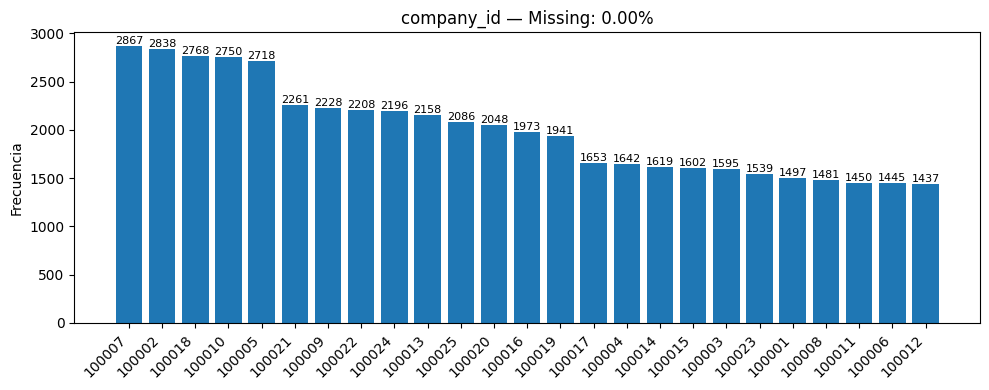

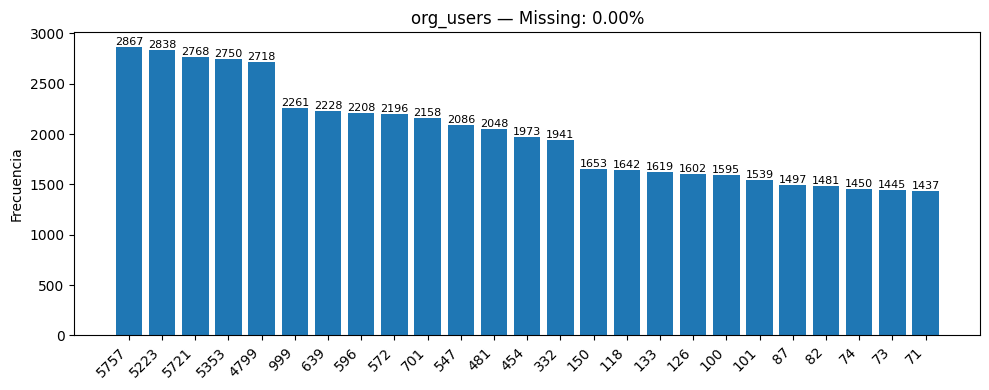

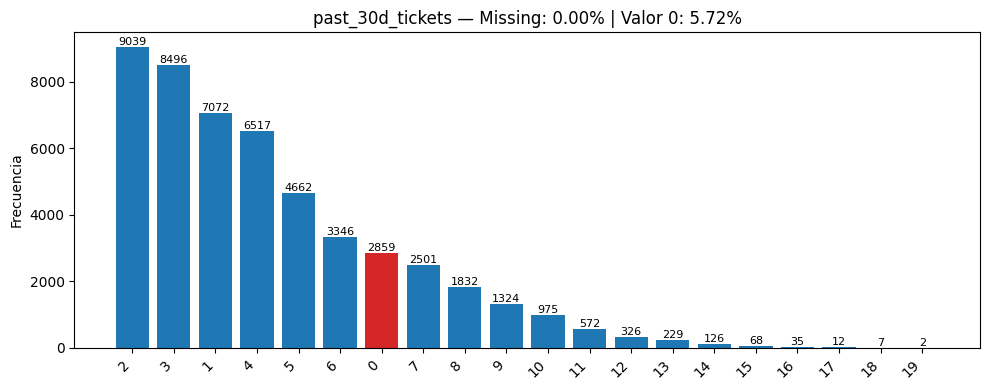

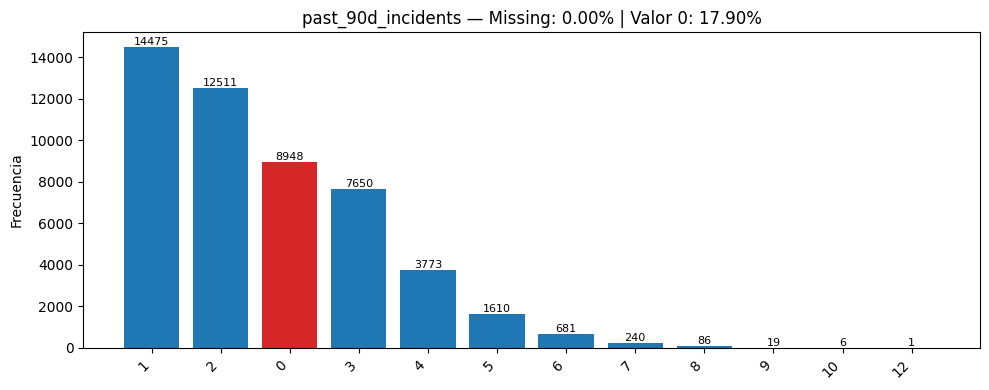

ℹ️ customers_affected: 2177 categorías. Se muestran las top 60.


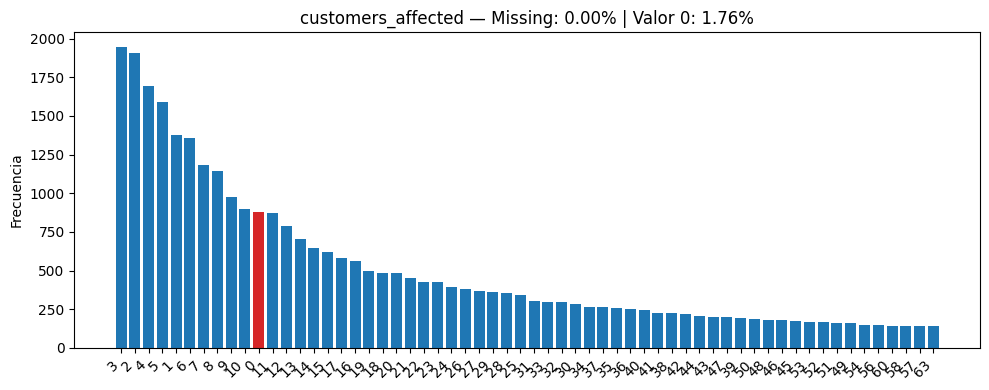

ℹ️ downtime_min: 147 categorías. Se muestran las top 60.


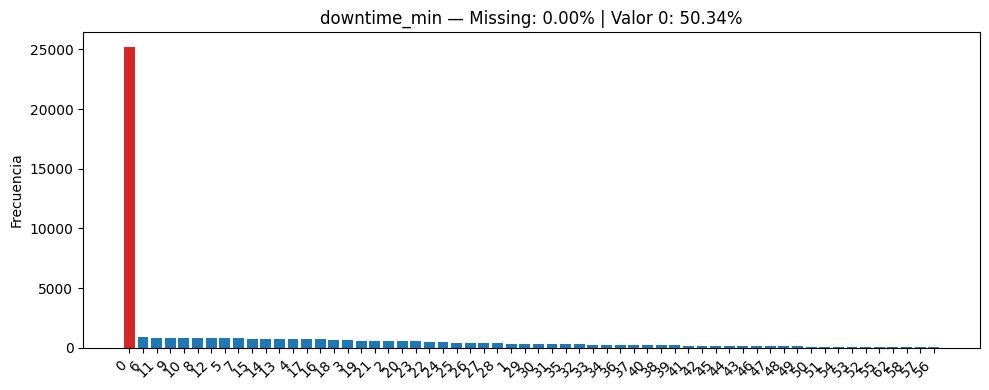

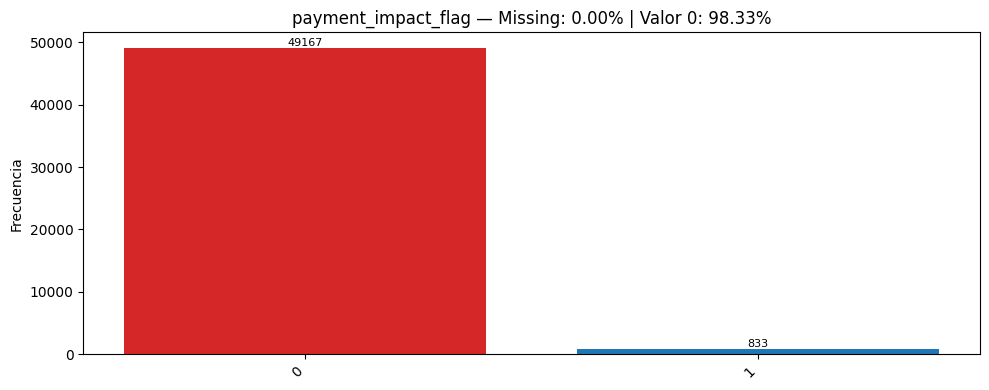

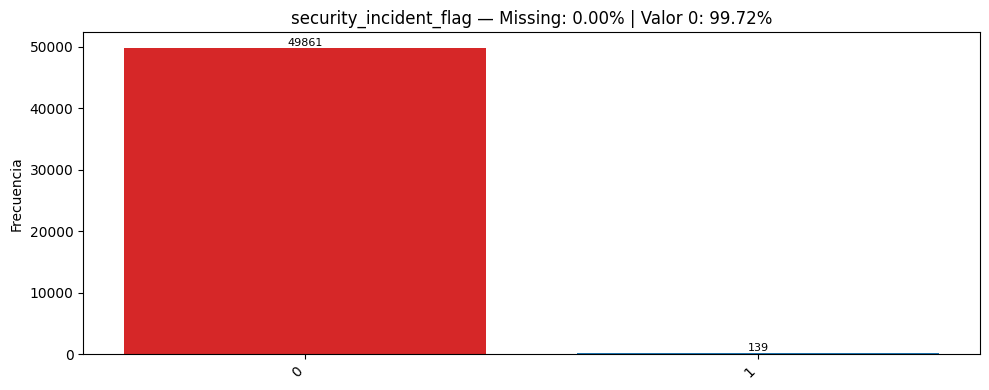

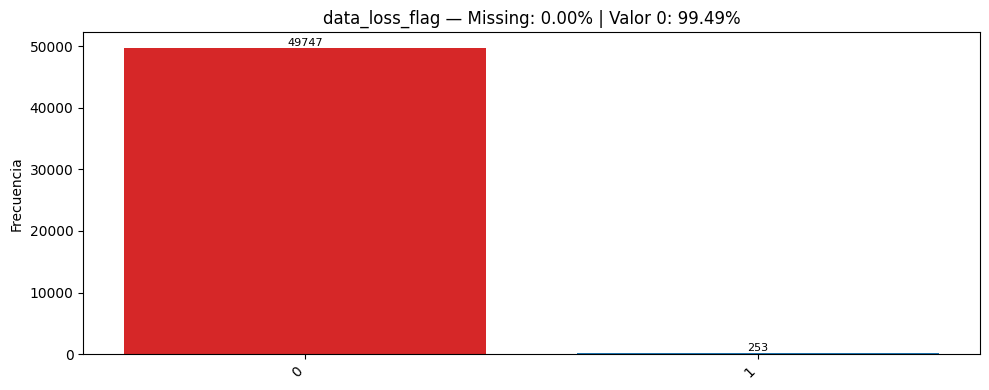

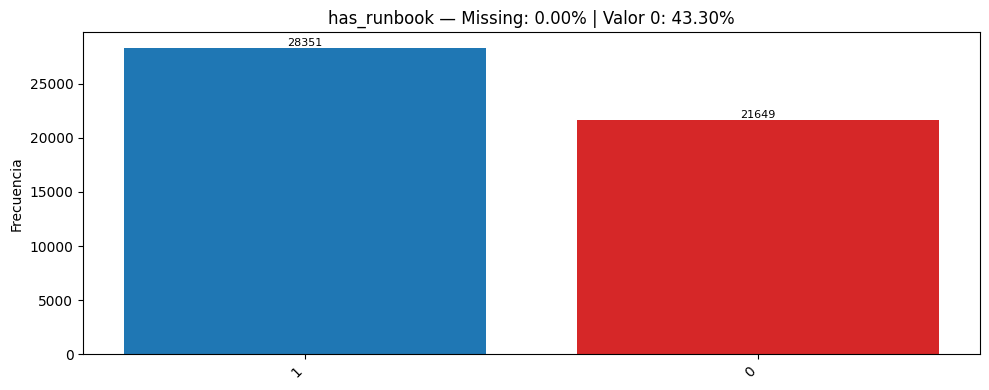

ℹ️ description_length: 679 categorías. Se muestran las top 60.


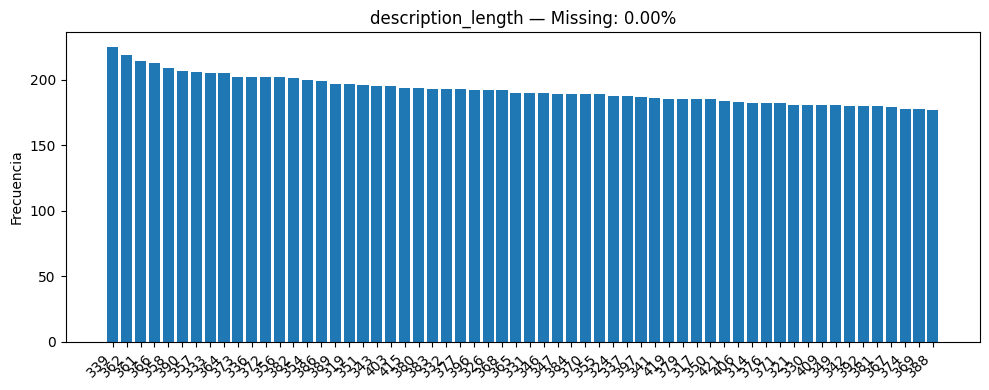

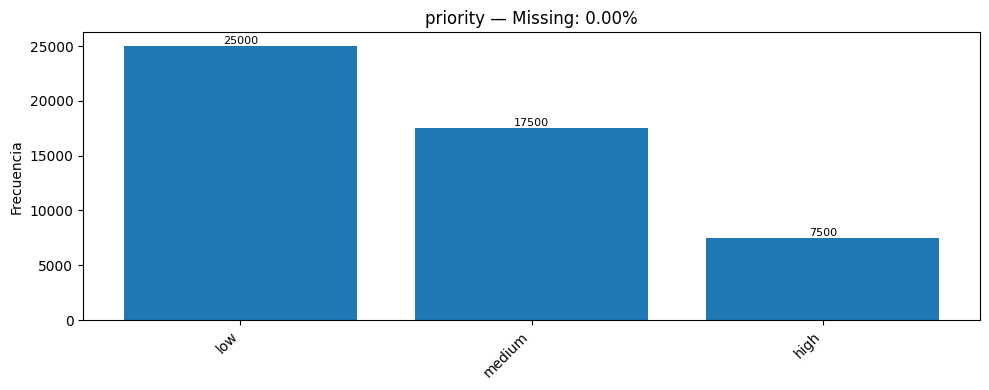

In [11]:
# =======================
# BLOQUE 1 — FRECUENCIAS (una gráfica por COLUMNA)
# =======================

# Col a analizar de forma independeinte
cols_simple = [
    "company_id", "org_users", "past_30d_tickets", "past_90d_incidents",
    "customers_affected", "downtime_min",
    "payment_impact_flag", "security_incident_flag", "data_loss_flag", "has_runbook",
    "description_length", "priority"
]

def _prep_series_for_counts(s: pd.Series):
    """Devuelve serie como str (para etiquetas), con NaN->'Missing'."""
    if isinstance(s.dtype, pd.CategoricalDtype):
        s = s.astype("object")
    return s.fillna("Missing")

def plot_value_counts(df, col, max_bars=60, annotate_if_leq=40):
    """
    Barra de frecuencias para 'col'.
    - Si hay demasiadas categorías, muestra las top 'max_bars' (no agrega 'Other').
    - Resalta la etiqueta 0 (o '0') en rojo si existe.
    - Muestra % de Missing y % de ceros en el título (si aplica).
    """
    if col not in df.columns:
        print(f" Columna no encontrada: {col}")
        return

    s_raw = df[col]
    s = _prep_series_for_counts(s_raw)

    # Conteos con Missing explícito
    vc = s.value_counts(dropna=False)

    # Estadísticas para el título
    n = len(s)
    pct_missing = (s_raw.isna().mean() * 100) if hasattr(s_raw, "isna") else 0
    # Conteo de ceros reales (solo cuando el dtype original puede tener ceros significativos)
    zero_mask = None
    try:
        zero_mask = (pd.to_numeric(s_raw, errors="coerce") == 0)
        pct_zero = (zero_mask.fillna(False).mean() * 100)
    except Exception:
        pct_zero = 0.0

    # Limitar a top max_bars si hay demasiadas categorías (sin "Other")
    if len(vc) > max_bars:
        print(f"ℹ️ {col}: {len(vc)} categorías. Se muestran las top {max_bars}.")
        vc = vc.head(max_bars)

    # Preparar colores (resaltar '0')
    labels = vc.index.astype(str)
    colors = ["tab:blue"] * len(vc)
    for i, lab in enumerate(labels):
        if lab.strip() in {"0", "0.0"}:
            colors[i] = "tab:red"

    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(vc)), vc.values, color=colors, edgecolor="none")
    plt.xticks(range(len(vc)), labels, rotation=45, ha="right")
    plt.ylabel("Frecuencia")
    ttl = f"{col} — Missing: {pct_missing:.2f}%"
    # Solo mostramos % de cero si tiene sentido (si existe algún 0)
    if (zero_mask is not None) and (pd.to_numeric(s_raw, errors="coerce") == 0).any():
        ttl += f" | Valor 0: {pct_zero:.2f}%"
    plt.title(ttl)
    plt.tight_layout()

    # Anotar valores si hay pocas barras
    if len(vc) <= annotate_if_leq:
        for i, v in enumerate(vc.values):
            plt.text(i, v, str(int(v)), ha="center", va="bottom", fontsize=8)
    plt.show()

# Ejecutar para cada columna solicitada
for c in cols_simple:
    plot_value_counts(dc, c, max_bars=60, annotate_if_leq=40)


**Descripcón de las gráficas:**

**company_id**
Se presentan todas las subcategorías (25), no hay repetición de de subcategoría por errores en la etiqueta. La empresa con más reportes supera por el doble a la que tiene menos reportes.

**org_users**
Se presentan todas las subcategorías (25), no hay repetición de subcategoría por errores en la etiqueta.La gráfica es exactamente igual a la anterior, a más usuarios más tickets. Verificar si son redundantes company_id y org_users

**past_30d_tickets**
Se presentan todas las subcategorías (20); no hay repetición de subcategoría por errores en la etiqueta. Hay 2859 subcategorías con valor de cero, podría ser que no hubiera quejas o que se quedara nulo, así que consideraremos como cero quejas.

**past_90d_incidentes**
Se presentan todas las subcategorías (12); no hay repetición de subcategoría por errores en la etiqueta. Hay 8948 subcategorías con valor de cero, podría ser que no hubiera quejas o que se quedara nulo, así que consideraremos como cero quejas.

**customer_affected**
Se presentan 60 de 2177 subcategorías, hay cerca de mil tickets (1.76%) que o dejaron nulo el campo o no provocaron afectaciones a consumidores de las empresas a quienes da servicio, asumiremos la segunda.

**downtime_min**
Se presentan 60 de 147 donde el 50.34% (~25000) de los tickets no reportan minutos sin servicio, el valor más cercano no llega a los 1,000 tickets. Esta variable podría ser predictor de nivel de importancia.
payment_impact_flag Variable de naturaleza booleana, el 98.33% del valor está en cero por lo que tenemos una desbalance de clase, hay que consideralo al elegir el modelo

**security_incident_flag**
Variable de naturaleza booleana, el 99.72% del valor está en cero por lo que tenemos una desbalance de clase, hay que consideralo al elegir el modelo

**data_loss_flag**
Variable de naturaleza booleana, el 99.49% del valor está en cero por lo que tenemos una desbalance de clase, hay que consideralo al elegir el modelo

**has_runbook**
Variable de naturaleza booleana, el 43.30% de los valores son cero

**description_lenght**
Se presentan 60 de 679 categorías, las primeras 60 tienen una diferencia de frecuencia muy pequña entre ellas.

**priority**
Se presentan 3 categorías low con 25k tickets, medium con 17.5K, y high con 7.5K, esta categoría es muy importante porque es nuestra variable **target**

**Conclusión: **

No hay categorías repetidas por un error de escritura, ni valores nulo (aunque en agunos casos el cero podría representar tanto una omisión en el ticket como una declaración de no es el caso) Como en todos los casos el cero es un caso muy probable, lo consideraremos como información válido que indica que no es el caso

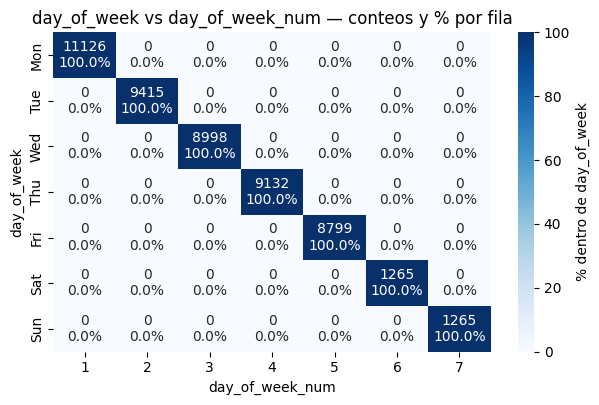

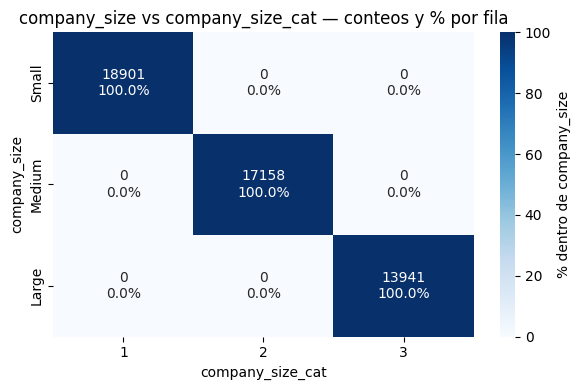

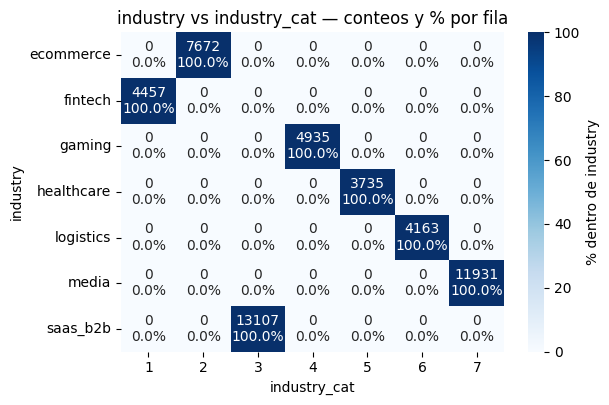

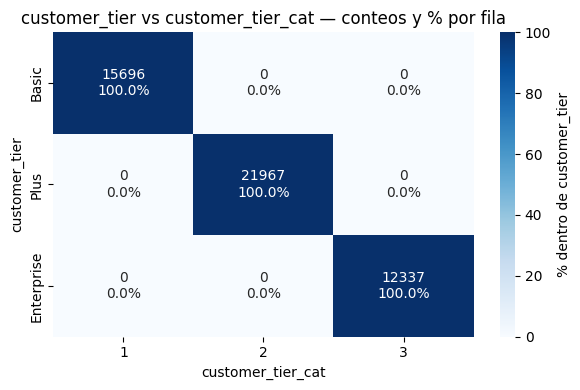

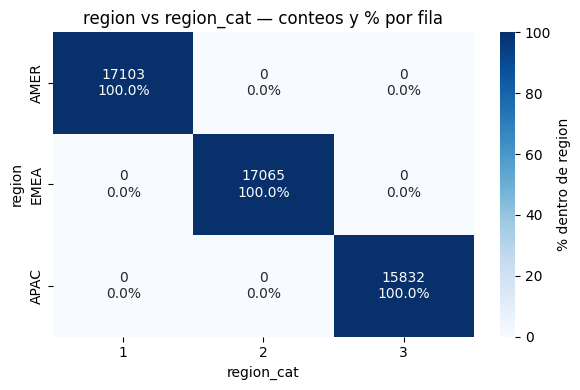

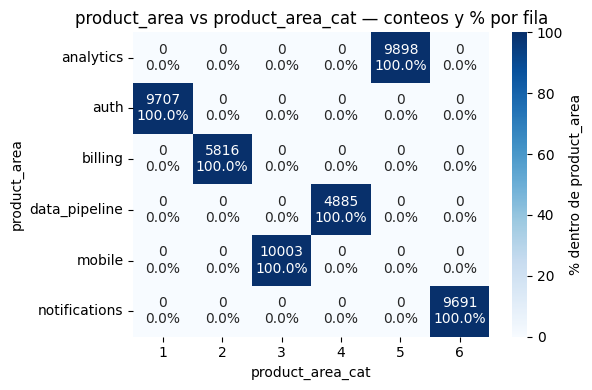

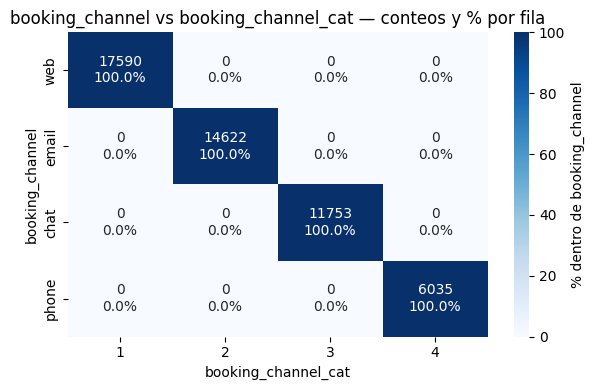

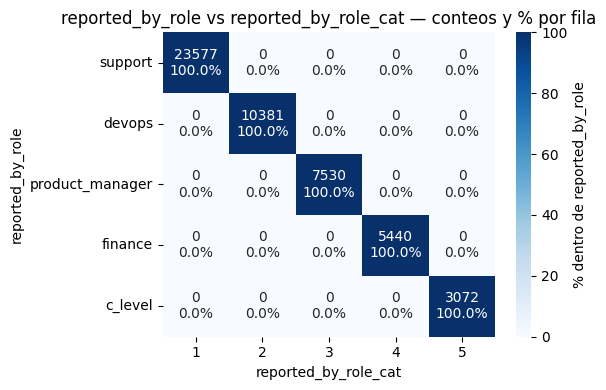

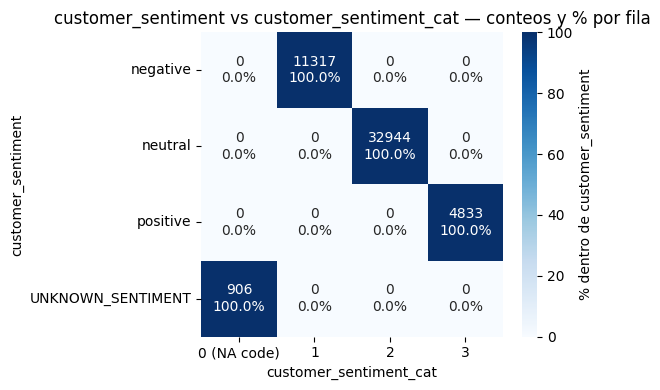

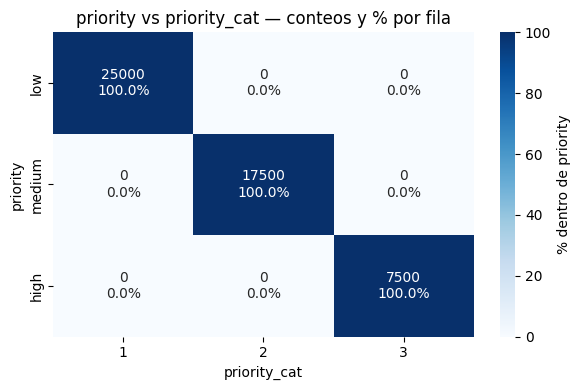

In [67]:
# === HEATMAP por PAR: frecuencias en UNA sola gráfica (conteos + % por fila) ===

pairs = [
    ("day_of_week", "day_of_week_num"),
    ("company_size", "company_size_cat"),
    ("industry", "industry_cat"),
    ("customer_tier", "customer_tier_cat"),
    ("region", "region_cat"),
    ("product_area", "product_area_cat"),
    ("booking_channel", "booking_channel_cat"),
    ("reported_by_role", "reported_by_role_cat"),
    ("customer_sentiment", "customer_sentiment_cat"),
    ("priority", "priority_cat"),
]

# Órdenes amigables (se aplican si existen esas categorías)
row_orders = {
    "day_of_week":      ["Mon","Tue","Wed","Thu","Fri","Sat","Sun","Missing"],
    "company_size":     ["Small","Medium","Large","Missing"],
    "customer_tier":    ["Basic","Plus","Enterprise","Missing"],
    "region":           ["AMER","EMEA","APAC","Missing"],
    "priority":         ["low","medium","high","Missing"],
    "booking_channel":  ["web","email","chat","phone","Missing"],
    "reported_by_role": ["support","devops","product_manager","finance","c_level","Missing"],
    "customer_sentiment":["negative","neutral","positive","UNKNOWN_SENTIMENT","Missing"],
}

def _to_str_labels(s: pd.Series):
    #Convierte a etiquetas string y marca Missing; compatible con dtype category.
    if isinstance(s.dtype, pd.CategoricalDtype):
        s = s.astype("object")
    return s.fillna("Missing").astype(str).str.strip()

def _code_display(v, code_col):
    #Texto para el código; en customer_sentiment_cat, el 0 se muestra como '0 (NA code)'.
    if pd.isna(v): return "Missing"
    try:
        iv = int(v)
        if code_col == "customer_sentiment_cat" and iv == 0:
            return "0 (NA code)"
        return str(iv)
    except Exception:
        return str(v)

def _order_code_cols(code_series, code_col):
      #Orden ascendente por valor numérico cuando sea posible; Missing al final.
    num = pd.to_numeric(code_series, errors="coerce")
    # pares (label, num_sort_key)
    labels = code_series.astype(object)
    pairs = []
    for lab, nv in zip(labels, num):
        if lab == "Missing":
            pairs.append((lab, (1, np.inf)))  # Missing al final
        else:
            # extraer número si existe en el texto, si no, inf
            try:
                key = int(str(lab).split()[0])
            except:
                key = np.inf
            pairs.append((lab, (0, key)))
    # ordenar por (is_missing, numeric_key)
    ordered = [lab for lab, _ in sorted(dict(pairs).items(), key=lambda x: x[1])]
    # mantener únicos conservando orden
    seen, out = set(), []
    for x in ordered:
        if x not in seen:
            seen.add(x); out.append(x)
    return out

def plot_pair_heatmap(df, label_col, code_col):
    if label_col not in df.columns or code_col not in df.columns:
        print(f" Omitido: faltan columnas {label_col} o {code_col}")
        return

    lab = _to_str_labels(df[label_col])
    code_raw = df[code_col]

    # Etiquetas legibles para códigos
    code_disp = code_raw.map(lambda v: _code_display(v, code_col))
    code_disp = code_disp.fillna("Missing").astype(str)

    # Crosstab de conteos
    ct = pd.crosstab(lab, code_disp)

    # Reordenar filas si tenemos un orden preferido
    if label_col in row_orders:
        order = [x for x in row_orders[label_col] if x in ct.index]
        rest  = [x for x in ct.index if x not in order]
        ct = ct.reindex(index=order + rest)

    # Reordenar columnas con orden ascendente por código (si aplica)
    col_order = _order_code_cols(pd.Index(ct.columns), code_col)
    ct = ct.reindex(columns=col_order)

    # % por fila
    row_pct = ct.div(ct.sum(axis=1).replace(0, np.nan), axis=0) * 100

    # Etiquetas "conteo\nxx.x%"
    labels = np.array([[f"{ct.iloc[i,j]}\n{row_pct.iloc[i,j]:.1f}%" for j in range(ct.shape[1])]
                       for i in range(ct.shape[0])])

    plt.figure(figsize=(max(6, 0.6*ct.shape[1]+2), max(4, 0.45*ct.shape[0]+1)))
    ax = sns.heatmap(row_pct, annot=labels, fmt="", cmap="Blues", cbar_kws={"label": f"% dentro de {label_col}"})
    ax.set_title(f"{label_col} vs {code_col} — conteos y % por fila")
    ax.set_xlabel(code_col); ax.set_ylabel(label_col)
    plt.tight_layout()
    plt.show()

# Ejecuta una sola gráfica por PAR
for lab_col, code_col in pairs:
    plot_pair_heatmap(dc, lab_col, code_col)


La gráficas muestran la los valores tanto en la columna con texto y la columna con númeors, mostrando que existe una correspondencia de 1 a 1 entre los elementos de cada columna, con lo que confirmamos que las columnas _num y _cat son indices de las categorías, por lo que podemos eliminarlas para quedarnos solo con las variables categóricas.

También podemos ver que no hay redundancias por error en las subcategorías de cada columna, por lo que no hay que hacer nada al respecto

**Conclusiones**:

Eliminar las columnas: day_of_week_num, company_size_cat, industry_cat, customer_tier_cat, region_cat, product_area_cat, booking_channel_cat reported_by_role_cat, customer_sentiment_cat, priority_cat

No es necesario conolidar subcategorías ni renombrar etiquetas

In [68]:
#Borramos las columnas sobrantes del dataset
dc.drop(columns=["day_of_week_num","company_size_cat","industry_cat","customer_tier_cat","region_cat","product_area_cat","booking_channel_cat","reported_by_role_cat","customer_sentiment_cat","priority_cat"], errors="ignore", inplace=True)
dc.info()
dc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   day_of_week             50000 non-null  object  
 1   company_id              50000 non-null  int64   
 2   company_size            50000 non-null  object  
 3   industry                50000 non-null  object  
 4   customer_tier           50000 non-null  object  
 5   org_users               50000 non-null  int64   
 6   region                  50000 non-null  object  
 7   past_30d_tickets        50000 non-null  int64   
 8   past_90d_incidents      50000 non-null  int64   
 9   product_area            50000 non-null  object  
 10  booking_channel         50000 non-null  object  
 11  reported_by_role        50000 non-null  object  
 12  customers_affected      50000 non-null  int64   
 13  error_rate_pct          50000 non-null  float64 
 14  downtime_min          

,day_of_week,company_id,company_size,industry,customer_tier,org_users,region,past_30d_tickets,past_90d_incidents,product_area,booking_channel,reported_by_role,customers_affected,error_rate_pct,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,description_length,priority
0,Wed,100015,Small,media,Basic,126,APAC,2,0,mobile,web,support,2,5.451201,6,0,0,0,0,neutral,227,low
1,Sat,100023,Small,healthcare,Basic,101,AMER,2,3,analytics,chat,product_manager,24,2.495538,2,0,0,0,0,neutral,461,low
2,Mon,100012,Small,gaming,Basic,71,APAC,3,1,notifications,chat,devops,1,3.328402,0,0,0,0,1,positive,306,low
3,Wed,100003,Small,media,Plus,100,AMER,2,2,analytics,chat,finance,25,2.931906,16,0,0,0,1,neutral,363,medium
4,Mon,100019,Small,ecommerce,Plus,332,AMER,5,1,analytics,web,support,28,3.255222,6,0,0,0,0,neutral,442,low


# **Análisis para escalamiento de variables númericas**

In [12]:
# Calcular y mostrar estadísticas descriptivas para las columnas especificadas
cols_to_describe = [
    "past_30d_tickets",
    "past_90d_incidents",
    "customers_affected",
    "downtime_min",
    "description_length"
]

display(dc[cols_to_describe].describe())

,past_30d_tickets,past_90d_incidents,customers_affected,downtime_min,description_length
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.816280,1.845720,182.979900,11.115640,369.795320
std,2.784206,1.467774,427.012709,17.294065,104.316407
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,2.000000,1.000000,8.000000,0.000000,297.000000
50%,3.000000,2.000000,31.000000,0.000000,368.000000
75%,5.000000,3.000000,151.000000,17.000000,440.250000
max,19.000000,12.000000,5757.000000,196.000000,815.000000


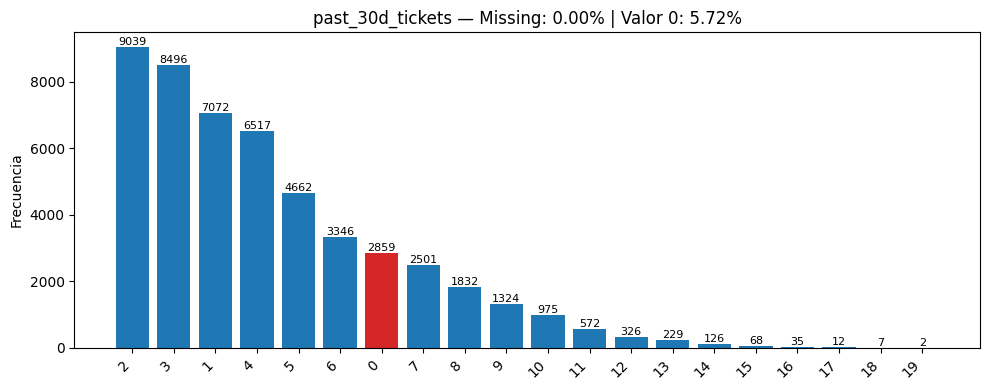

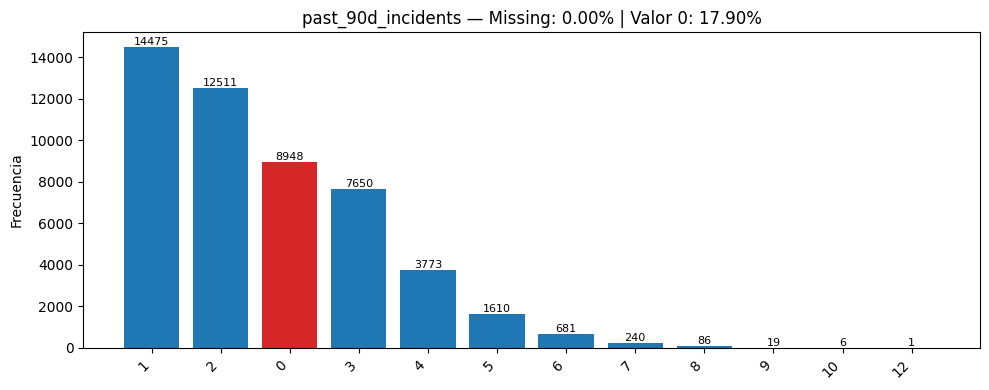

ℹ️ customers_affected: 2177 categorías. Se muestran las top 60.


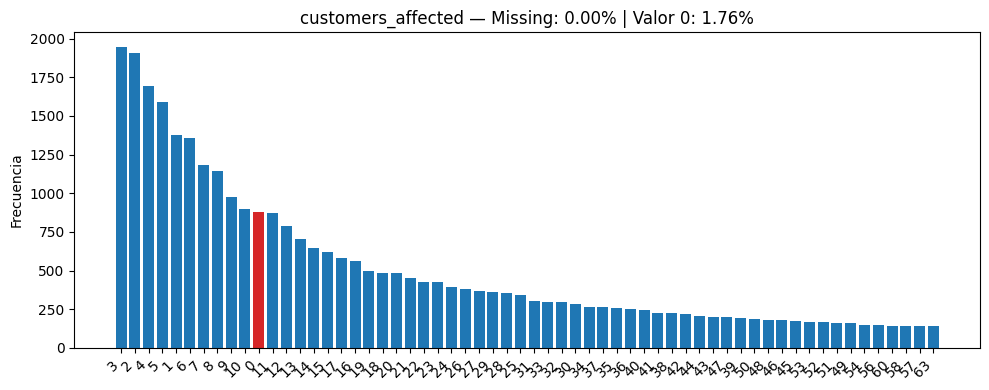

ℹ️ downtime_min: 147 categorías. Se muestran las top 60.


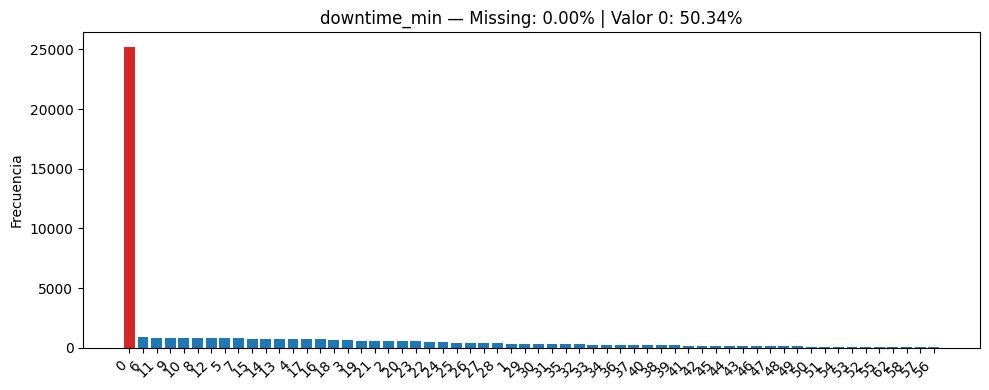

ℹ️ description_length: 679 categorías. Se muestran las top 60.


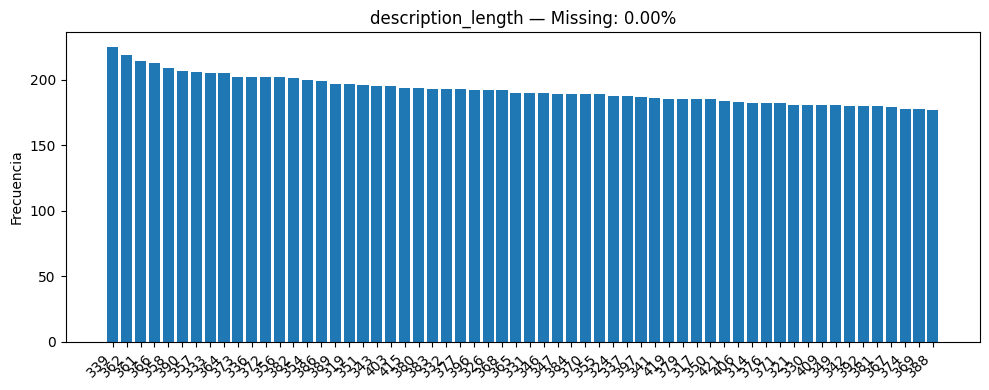

In [14]:
#Crear tablas para cada una de las variables numéricas
for col in cols_to_describe:
    plot_value_counts(dc, col)

**Descripción de los datos**

**past_30d_tickets**
Tenemos que las empresas presentan en promedio 4 tickets al mes (media=3.8), la mitad de ellas presenta 3 o menos (mediana 50% =3); sin embargo hay empresas que presentaron hasta 19 tickets (max:19), tenemos una distibución de 0 a 19 (un rango corto), por lo que podemos decir que es una variable numérica, discreta, con escala moderada
**Conclusión: **
Escalamos de forma estándard.

**past_90d_incidents**
Tenemos que las empresas phan resentado en promedio 2 tickets en los últimos 3 meses (media=2), la mayoría de ellas presenta entre 1 y 2 (mediana 50% =2); pocas empresas han acumulado hasta 12 tickets (max:12), tenemos una distibución de 0 a 12 (un rango corto), por lo que podemos decir que es una variable numérica, discreta, con escala moderada.
**Conclusión: **
Escalamos de forma estándard.

**customer_affected**
El promedio de usuarios afectados es de 183 (media=183) la mitad de los tickets afecta a 31 personas o menos(mediana 50%= 31), sin embargo hay reportes que afecta a 5,757 usuarios (Max=5,757) y tenemos una distribución de 0 a 5,757, tenemo una variable numérica, discreta con un sego muy grande a la derecha.
**Conclusión:**
Escalamos por medio de una transformación logarítmica.

**downtime_min**
El promedio de tiempo sin servicio es de 11 minutos (media 50%=11), sin embargo más de la mitad de los tickets no reportan caida del servicio (mediana 50% = 0) y sólo un cuarto de los reportes son de 17 minutos o más (Q3 75%=17), sin embargo el valor máximo es de ~3.2horas (Max:196) la distribución es de 0 a 196, por lo que tenemos una variable numérica, discreta con un sesgo muy grande al cero, y muy pocos casos muy grandes.
**Conclusión: **
Aplicar un log-transform antes de escalar para reducir el impacto de los valores grandes.

**description_length**
El promedio de los reportes tienen 370 (media 50%= 369.7), la mitad de os tickets tienen 368 o menos (mediana 50% = 368) el reporte más largo es de 815 (máx = 815) tenemos un rango de 20 a 815 por lo que tenemos una variable numérica, discreta con un rango sin valores extremos.
**Conclusión:**
Escalamos de forma estándard.

**Conclusión final:**
Aplicar **Log-transform (log1p) + Z-score** log-trnsform a downtime_min, customer_affected.
Escalar con **Z-score** a past_30d_tickets, past_90d_incidents, y description_length.

Además podemos asumir que en variables como downtime_min o customer_affected, tenemos **outliers**, sin embargo un outlier como 5,757 usuarios puede ser un criterio para dar alta prioridad al ticket, por lo tanto **no los quitaremos**, solo reduciremos su influencia al escalarlos.

In [18]:
# Aplicamos log1p(x) a 'customers_affected' and 'downtime_min'
dc['customers_affected_log'] = np.log1p(dc['customers_affected'])
dc['downtime_min_log'] = np.log1p(dc['downtime_min'])

print("Log1p transformación applicada a 'customers_affected' and 'downtime_min'.")
display(dc[['customers_affected', 'customers_affected_log', 'downtime_min', 'downtime_min_log']].head())
print("Valores máximos transformados")
display(dc[['customers_affected', 'customers_affected_log', 'downtime_min', 'downtime_min_log']].max())

Log1p transformación applicada a 'customers_affected' and 'downtime_min'.


,customers_affected,customers_affected_log,downtime_min,downtime_min_log
0,2,1.098612,6,1.945910
1,24,3.218876,2,1.098612
2,1,0.693147,0,0.000000
3,25,3.258097,16,2.833213
4,28,3.367296,6,1.945910


Valores máximos transformados


,0
customers_affected,5757.000000
customers_affected_log,8.658345
downtime_min,196.000000
downtime_min_log,5.283204


In [20]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    "past_30d_tickets",
    "past_90d_incidents",
    "description_length",
    "downtime_min_log",
    "customers_affected_log"
]

# Iniciamos StandardScaler
scaler = StandardScaler()

 #Aplicamos la escalación estsndard (z-score)
dc[cols_to_scale] = scaler.fit_transform(dc[cols_to_scale])

print("Datos escalados (primeras 5 filas):")
display(dc[cols_to_scale].head())

print("\nValores Min and Max después de escalar:")
display(dc[cols_to_scale].agg(['min', 'max']))

Datos escalados (primeras 5 filas):


,past_30d_tickets,past_90d_incidents,description_length,downtime_min_log,customers_affected_log
0,-0.652358,-1.257509,-1.368881,0.345205,-1.387750
1,-0.652358,0.786423,0.874317,-0.206401,-0.228376
2,-0.293185,-0.576198,-0.611562,-0.921618,-1.609461
3,-0.652358,0.105113,-0.065142,0.922856,-0.206930
4,0.425160,-0.576198,0.692177,0.345205,-0.147219



Valores Min and Max después de escalar:


,past_30d_tickets,past_90d_incidents,description_length,downtime_min_log,customers_affected_log
min,-1.370703,-1.257509,-3.353248,-0.921618,-1.988478
max,5.453574,6.918218,4.267873,2.517845,2.745960


In [21]:
cols_to_drop = [
    "past_30d_tickets",
    "past_90d_incidents",
    "description_length",
    "customers_affected",
    "downtime_min"
]

# Borramos las columnas originales no escaladas de dc
dc.drop(columns=cols_to_drop, inplace=True)

print("Información de dc:")
dc.info()
display(dc.head())

Información de dc:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   day_of_week             50000 non-null  object  
 1   day_of_week_num         50000 non-null  int64   
 2   company_id              50000 non-null  int64   
 3   company_size            50000 non-null  object  
 4   company_size_cat        50000 non-null  int64   
 5   industry                50000 non-null  object  
 6   industry_cat            50000 non-null  int64   
 7   customer_tier           50000 non-null  object  
 8   customer_tier_cat       50000 non-null  int64   
 9   org_users               50000 non-null  int64   
 10  region                  50000 non-null  object  
 11  region_cat              50000 non-null  int64   
 12  product_area            50000 non-null  object  
 13  product_area_cat        50000 non-null  int64   
 14  boo

,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,org_users,region,region_cat,product_area,product_area_cat,booking_channel,booking_channel_cat,reported_by_role,reported_by_role_cat,error_rate_pct,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,priority,priority_cat,customers_affected_log,downtime_min_log
0,Wed,3,100015,Small,1,media,7,Basic,1,126,APAC,3,mobile,3,web,1,support,1,5.451201,0,0,0,0,neutral,2,low,1,-1.387750,0.345205
1,Sat,6,100023,Small,1,healthcare,5,Basic,1,101,AMER,1,analytics,5,chat,3,product_manager,3,2.495538,0,0,0,0,neutral,2,low,1,-0.228376,-0.206401
2,Mon,1,100012,Small,1,gaming,4,Basic,1,71,APAC,3,notifications,6,chat,3,devops,2,3.328402,0,0,0,1,positive,3,low,1,-1.609461,-0.921618
3,Wed,3,100003,Small,1,media,7,Plus,2,100,AMER,1,analytics,5,chat,3,finance,4,2.931906,0,0,0,1,neutral,2,medium,2,-0.206930,0.922856
4,Mon,1,100019,Small,1,ecommerce,2,Plus,2,332,AMER,1,analytics,5,web,1,support,1,3.255222,0,0,0,0,neutral,2,low,1,-0.147219,0.345205


# **Análisis y codificación de variables categóricas**